# Easy
Для данных с Титаника обучить модели логистической регресси на 80% обучающей выборки и проверить результат на 20%. Вывести accuracy.

# Normal¶
Для датасета Boston сделать лучшую линейную модель, которую можно легко интерпретировать. Сделать выводы о данных на основе вашей линейной регрессии.

______________________________________________________________________________________________________________

# EASY

In [111]:
# импортируем все библиотеки и выводим датасет
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tit_pass = pd.read_csv('/home/euegene/learn/DS_Learn/Data/train.csv')
tit_pass.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
# переводим категориальный столбец в числовой - будем предсказывать выживаемость по возрасту
tit_pass["Sex"] = tit_pass["Sex"].astype('category')
tit_pass["Sex_cat"] = tit_pass["Sex"].cat.codes
tit_pass.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [113]:
tit_pass.corr() #смотрим корреляцию - кажется, что выживаемость в большей степени линейно зависит Sex_cat и Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_cat
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
Sex_cat,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


In [114]:
# разбиваем дата сет
x_df = tit_pass[['Pclass','SibSp','Age','Parch','Fare','Sex_cat']] 
y_df = tit_pass['Survived']
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)

In [115]:
# обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(x_train[['Sex_cat']], y_train)

LogisticRegression()

In [116]:
# предсказываем и выводим средне-квадратичнуб ошибку (чем она меньше , тем модель точнее)
y_pred = model.predict(x_test[['Sex_cat']])
print(mean_squared_error(y_pred, y_test))

0.19553072625698323


In [117]:
# выводим Accuracy %
print('Accuracy ',accuracy_score(y_test, y_pred)*100 , '%')

Accuracy  80.44692737430168 %


------------------------------------------------------------------------------------------------------------------
# Normal

In [118]:
# загружаем датасет, выводим корреляцию
boston = load_boston()
boston['data']
x_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y_df = y_df = pd.DataFrame(boston['target'], columns=['y'])
full_df = pd.concat([x_df, y_df], axis=1)
full_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Мы видим что Y зависит в большей степени от LSTAT и RM, попробуем обучить модели на этих признаках и выбрать лучшую линейную модель

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [120]:
# обучаем модель на признаке RM
model2 = LinearRegression()
model2.fit(x_train[['RM']], y_train)

LinearRegression()

In [121]:
# делаем прогноз и выводим MSE
y_pred2 = model2.predict(x_test[['RM']])
mean_squared_error(y_pred2, y_test)

48.16684209558686

In [122]:
# обучаем модель на признаке LSTAT
model3 = LinearRegression()
model3.fit(x_train[['LSTAT']], y_train)

LinearRegression()

In [123]:
#делаем прогноз и выводим MSE
y_pred3 = model3.predict(x_test[['LSTAT']])
mean_squared_error(y_pred3, y_test)

36.20935723069498

Как видим MSE(model3[RM]) > MSE(model4[LSTAT]. Коритерий минимизации MSE указывает на большую эффективность модели, обученной на признаке LSTAT.
Чтобы визуально интерпретировать результаты построим графики совмещения исхоных данных и результата предсказания для каждой модели

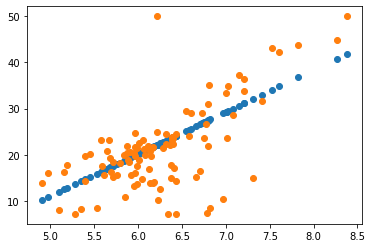

In [133]:
plt.scatter(x_test['RM'], y_pred2)
plt.scatter(x_test['RM'], y_test)

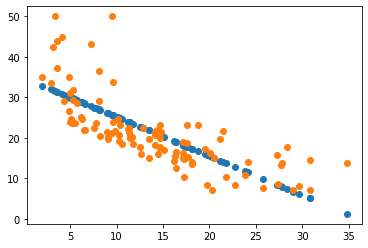

In [136]:
plt.scatter(x_test['LSTAT'], y_pred3)
plt.scatter(x_test['LSTAT'], y_test)

Мы видим что по призанку LSTAT предсказанный результат (синий) более соответствует тестовому распределению
- она лучшая